In [1]:
# --- CELL 0: INSTALL DEPENDENCIES ---
import sys

# Instalar kaleido explícitamente en el kernel actual
!{sys.executable} -m pip install -U kaleido

print("Instalación completada. Por favor, REINICIA EL KERNEL (Kernel -> Restart) y vuelve a ejecutar el código.")

Instalación completada. Por favor, REINICIA EL KERNEL (Kernel -> Restart) y vuelve a ejecutar el código.


"C:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Cell 1: Setup and Data Loading
This cell is robust. It ensures the data is loaded correctly and handles the column names (lowercasing) to avoid errors.

In [2]:
# --- CELL 1: SETUP AND DATA LOADING ---
import pandas as pd
import numpy as np
import os

# 1. Define your specific file name
file_path = 'train_256063.csv' 

print(f"Attempting to load: {file_path}...")

if os.path.exists(file_path):
    # Load CSV
    df_train = pd.read_csv(file_path)
    
    # Normalize columns to lowercase (Prevents 'KeyError')
    df_train.columns = df_train.columns.str.lower()
    
    # Detect time column
    time_col = 'timestamp' # Default name
    if 'time' in df_train.columns: time_col = 'time'
    if 'date' in df_train.columns: time_col = 'date'
    
    # Convert to datetime and set as index
    df_train[time_col] = pd.to_datetime(df_train[time_col])
    df_train.set_index(time_col, inplace=True)
    
    print("Data loaded successfully.")
    print(f"Available columns: {df_train.columns.tolist()}")
else:
    print(f"ERROR: File '{file_path}' not found. Please check the file name.")

Attempting to load: train_256063.csv...
Data loaded successfully.
Available columns: ['pv_mod1', 'pv_mod2', 'pv_mod3', 'demand', 'pv', 'price', 'temperature', 'pressure (hpa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'shortwave_radiation (w/m²)', 'direct_radiation (w/m²)', 'diffuse_radiation (w/m²)', 'direct_normal_irradiance (w/m²)']


Cell 2: Statistical Summaries (Task 3.1)
This calculates the numerical stats required by the project.

In [3]:
# --- CELL 2: STATISTICAL DESCRIPTIVE ANALYSIS ---

# Define key variables to analyze
cols_to_analyze = ['demand', 'price', 'pv'] 

print("=== STATISTICAL SUMMARY TABLE ===")

# Check if columns exist before calculating
existing_cols = [c for c in cols_to_analyze if c in df_train.columns]

if existing_cols:
    # .describe() automatically calculates count, mean, std, min, quartiles, max
    stats_summary = df_train[existing_cols].describe().T
    display(stats_summary)
    
    # Save to CSV
    os.makedirs('results/task3', exist_ok=True)
    stats_summary.to_csv('results/task3/task3_statistics.csv')
    print("Table saved to 'results/task3/task3_statistics.csv'")
else:
    print(f"Error: Could not find columns {cols_to_analyze}.")

=== STATISTICAL SUMMARY TABLE ===


,count,mean,std,min,25%,50%,75%,max
demand,8759.0,0.530993,0.375317,0.0,0.28000,0.38000,0.660000,4.240
price,8759.0,0.046078,0.025252,0.0,0.02787,0.04543,0.060245,0.255
pv,8759.0,0.659565,1.106453,0.0,0.00000,0.00000,0.820000,4.810


Table saved to 'results/task3/task3_statistics.csv'


Cell 3: Advanced Visualization with Plotly (Task 3.2)
This is the major update. Instead of static images, we use plotly.graph_objects and make_subplots just like in your course file 06_plotly.ipynb. This creates interactive charts where you can zoom and hover over data.

Generating, saving and displaying 6 separate plots...


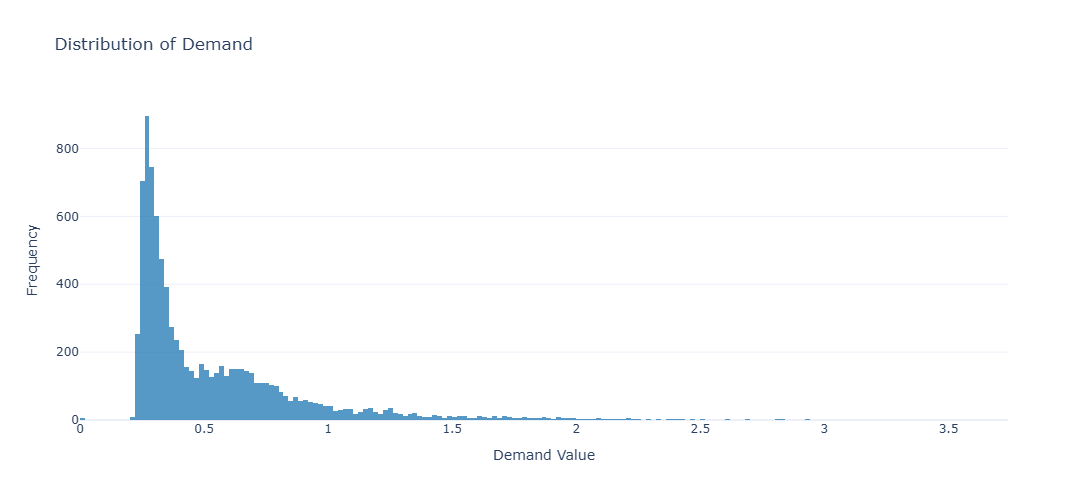

Saved Histogram: results/task3/hist_demand.png


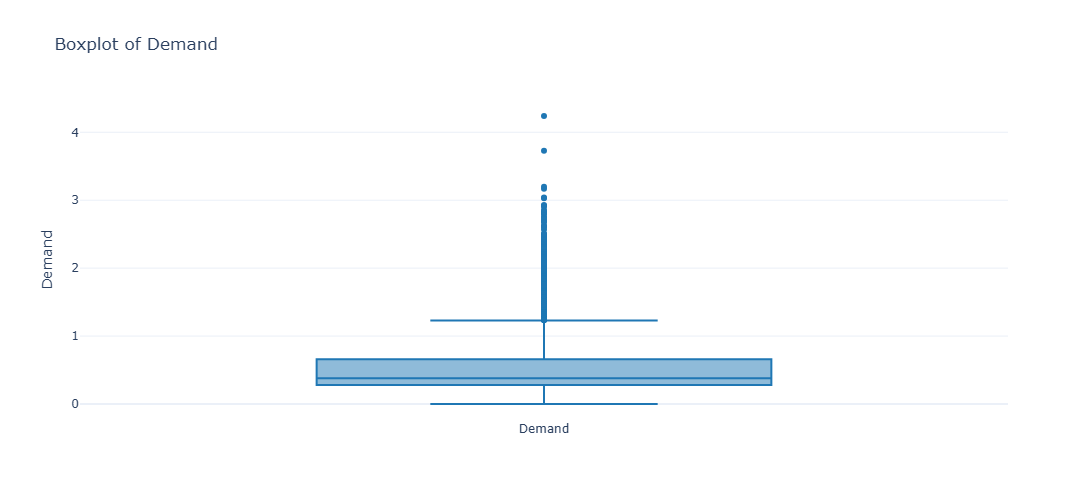

Saved Boxplot: results/task3/box_demand.png


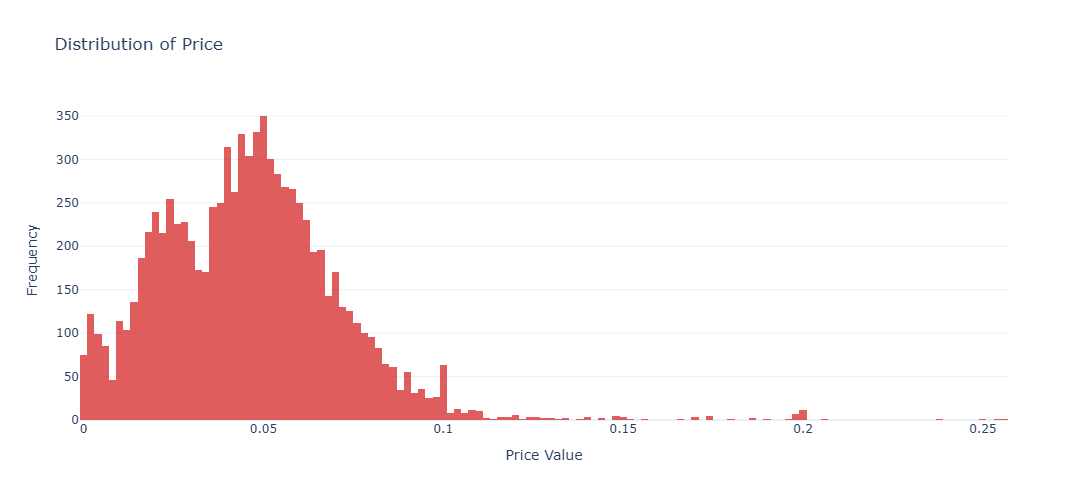

Saved Histogram: results/task3/hist_price.png


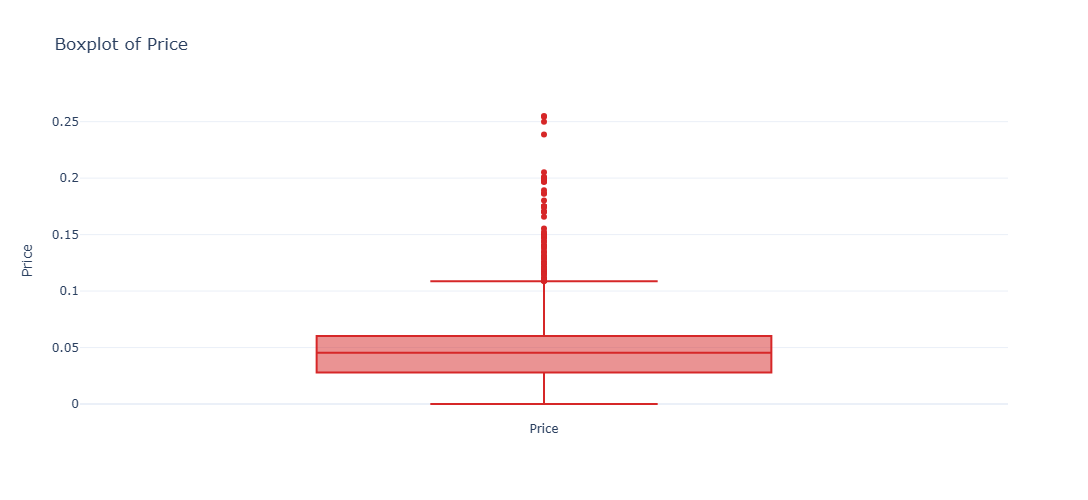

Saved Boxplot: results/task3/box_price.png


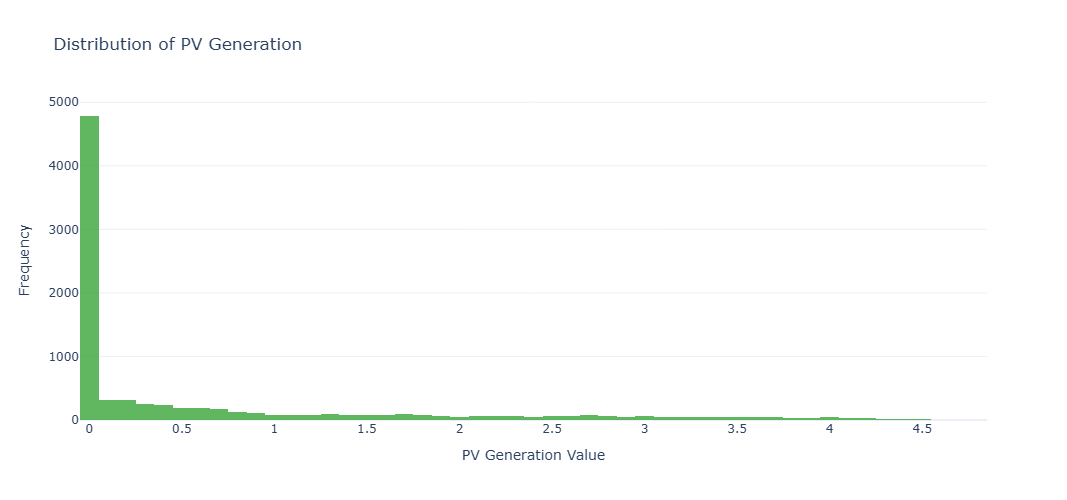

Saved Histogram: results/task3/hist_pv.png


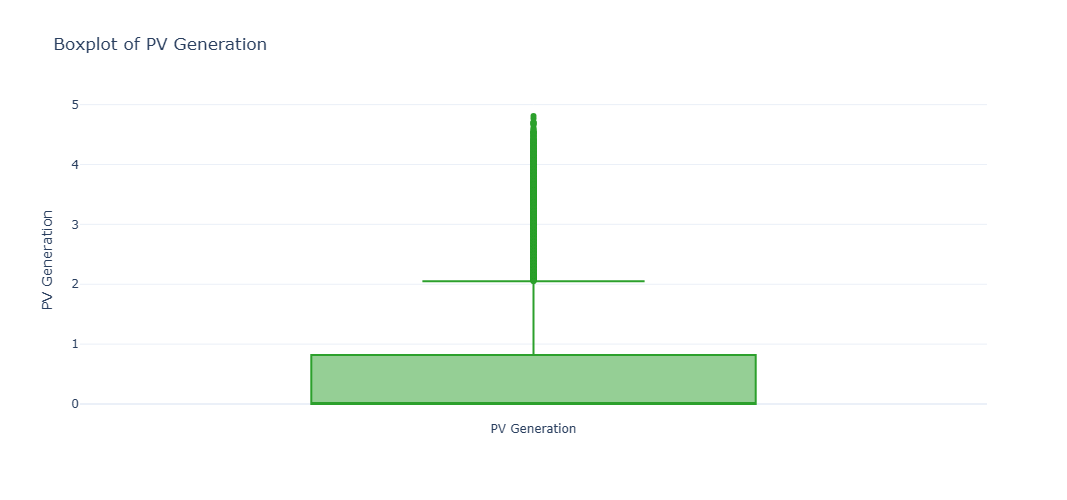

Saved Boxplot: results/task3/box_pv.png


In [4]:
# --- CELL 3: INDIVIDUAL PLOTS GENERATION (6 SEPARATE FIGURES) ---
import plotly.graph_objects as go
import plotly.io as pio
import os

# 1. Configuración de Estilo
pio.templates.default = "plotly_white"

def save_six_separate_plots(df):
    print("Generating, saving and displaying 6 separate plots...")
    
    # Variables a graficar
    variables = ['demand', 'price', 'pv']
    colors = ['#1f77b4', '#d62728', '#2ca02c'] # Azul, Rojo, Verde
    titles = ['Demand', 'Price', 'PV Generation']
    
    # Carpeta de salida
    output_dir = 'results/task3'
    os.makedirs(output_dir, exist_ok=True)
    
    # Bucle para generar 2 gráficos por cada variable (Total 6)
    for i, col in enumerate(variables):
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found.")
            continue
            
        color = colors[i]
        label = titles[i]
        
        # --- FIGURA A: HISTOGRAMA ---
        fig_hist = go.Figure()
        fig_hist.add_trace(go.Histogram(
            x=df[col], 
            name=label, 
            marker_color=color,
            opacity=0.75
        ))
        
        fig_hist.update_layout(
            title_text=f"Distribution of {label}",
            xaxis_title=f"{label} Value",
            yaxis_title="Frequency",
            height=500, width=700, # Tamaño individual
            showlegend=False
        )
        
        # MOSTRAR EN PANTALLA
        fig_hist.show()
        
        # Guardar Histograma
        path_hist = f"{output_dir}/hist_{col}.png"
        try:
            fig_hist.write_image(path_hist)
            print(f"Saved Histogram: {path_hist}")
        except Exception as e:
            print(f"Error saving {path_hist}: {e}")

        # --- FIGURA B: BOXPLOT ---
        fig_box = go.Figure()
        fig_box.add_trace(go.Box(
            y=df[col], 
            name=label, 
            marker_color=color,
            boxpoints='outliers' # Mostrar puntos atípicos
        ))
        
        fig_box.update_layout(
            title_text=f"Boxplot of {label}",
            yaxis_title=label,
            height=500, width=500, # Más estrecho para boxplot
            showlegend=False
        )
        
        # MOSTRAR EN PANTALLA
        fig_box.show()
        
        # Guardar Boxplot
        path_box = f"{output_dir}/box_{col}.png"
        try:
            fig_box.write_image(path_box)
            print(f"Saved Boxplot: {path_box}")
        except Exception as e:
            print(f"Error saving {path_box}: {e}")

# Ejecutar la función
# Asegúrate de que df_train esté definido antes de ejecutar esto
if 'df_train' in locals():
    save_six_separate_plots(df_train)
else:
    print("Por favor define 'df_train' antes de ejecutar la función.")